In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

data_size = 50
experience = np.random.randint(1, 21, size=data_size)
education = np.random.randint(1, 5, size=data_size)  

noise = np.random.normal(0, 500000, size=data_size)  
salary = np.round(1000000 * experience + 500000 * education + noise).astype(int)

df = pd.DataFrame({
    'Experience': experience,
    'Education': education,
    'Salary': salary
})

df.head()

,Experience,Education,Salary
0,7,4,8661539
1,20,4,22305838
2,15,2,16515500
3,11,2,12465640
4,8,2,8580391


In [461]:
x = df[["Experience", "Education"]]
y = df[["Salary"]]

scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y_norm = scaler_y.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_norm, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([0.57899619, 0.97751686, 0.32992078, 0.05785446, 0.57899619,
       0.15620687, 0.90471087, 0.57899619, 0.28138345, 0.80380295,
       0.03230804, 0.33119854, 0.35674496, 0.48064379, 0.48064379])

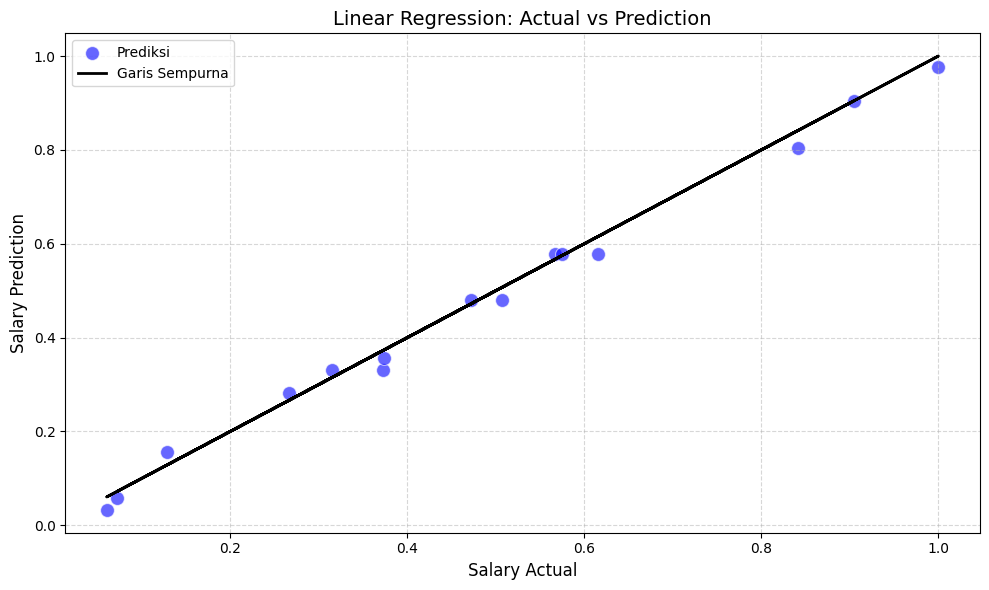

In [462]:
# Grafik menggunakan Seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, s=100, label='Prediksi')
plt.plot(y_test, y_test, color='black', linewidth=2, label='Garis Sempurna')
plt.xlabel('Salary Actual', fontsize=12)
plt.ylabel('Salary Prediction', fontsize=12)
plt.title('Linear Regression: Actual vs Prediction', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [463]:
model.score(x_test, y_test)

0.992814325133279

In [464]:
new_data = pd.DataFrame({
    'Experience': [1, 10, 5],
    'Education': [1, 2, 2]
})

new_data_scaled = scaler_x.transform(new_data)

prediction_norm = model.predict(new_data_scaled)
prediction = scaler_y.inverse_transform(prediction_norm.reshape(-1, 1))

new_data["Salary"] = np.round(prediction.flatten()).astype(int)

new_data

,Experience,Education,Salary
0,1,1,1332625
1,10,2,10928150
2,5,2,5871047


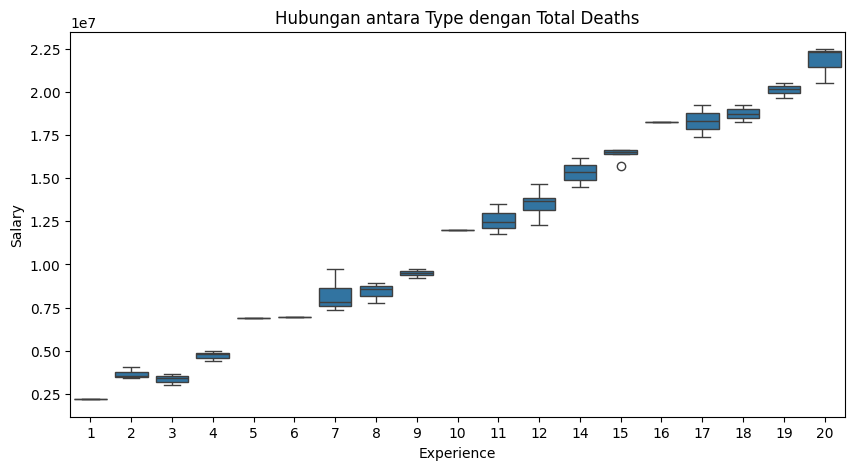

In [465]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experience', y='Salary', data=df)
plt.title('Hubungan antara Type dengan Total Deaths')
plt.show()

In [466]:
new_data_scaled

array([[0.        , 0.        ],
       [0.47368421, 0.33333333],
       [0.21052632, 0.33333333]])

In [467]:
prediction_norm

array([-0.0417757 ,  0.4308287 ,  0.18175329])

In [468]:
prediction_norm.reshape(-1, 1)

array([[-0.0417757 ],
       [ 0.4308287 ],
       [ 0.18175329]])

In [469]:
scaler_y.inverse_transform(prediction_norm.reshape(-1, 1))

array([[ 1332624.81195457],
       [10928150.30069915],
       [ 5871046.63752511]])

In [470]:
prediction.flatten()

array([ 1332624.81195457, 10928150.30069915,  5871046.63752511])

In [471]:
scaler_y.fit_transform(y).flatten()

array([0.31919224, 0.9912092 , 0.7060201 , 0.50655404, 0.3151955 ,
       0.278995  , 0.88579853, 0.55689673, 0.47181979, 0.10965363,
       0.33324371, 0.06014129, 0.06035633, 0.61552439, 0.23558382,
       0.0650601 , 0.        , 0.56623832, 0.54177249, 0.84163798,
       0.48273781, 0.79304065, 0.66536835, 0.7008708 , 0.90441069,
       0.57476178, 0.90452673, 0.04065298, 0.23194745, 0.86180878,
       0.37225737, 0.34772555, 0.26669953, 0.840658  , 0.13676866,
       0.68872634, 0.81534212, 0.3731285 , 0.09199008, 1.        ,
       0.71259399, 0.25391435, 0.49859019, 0.27519511, 0.71254903,
       0.07140196, 0.60687746, 0.74873224, 0.12862297, 0.7934029 ])

In [472]:
y_norm

array([0.31919224, 0.9912092 , 0.7060201 , 0.50655404, 0.3151955 ,
       0.278995  , 0.88579853, 0.55689673, 0.47181979, 0.10965363,
       0.33324371, 0.06014129, 0.06035633, 0.61552439, 0.23558382,
       0.0650601 , 0.        , 0.56623832, 0.54177249, 0.84163798,
       0.48273781, 0.79304065, 0.66536835, 0.7008708 , 0.90441069,
       0.57476178, 0.90452673, 0.04065298, 0.23194745, 0.86180878,
       0.37225737, 0.34772555, 0.26669953, 0.840658  , 0.13676866,
       0.68872634, 0.81534212, 0.3731285 , 0.09199008, 1.        ,
       0.71259399, 0.25391435, 0.49859019, 0.27519511, 0.71254903,
       0.07140196, 0.60687746, 0.74873224, 0.12862297, 0.7934029 ])

In [473]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the dataset
df = pd.read_csv("death_clean.csv")

# Memilih kolom yang relevan
x = df[['Cause', 'Type', 'Year']]
y = df[['Total Deaths']]

# Melakukan One-Hot Encoding untuk kolom kategori
x_encoded = pd.get_dummies(x, columns=['Cause', 'Type'], drop_first=True)

# Normalisasi target variable
scaler = MinMaxScaler()
y_norm = scaler.fit_transform(y).ravel()

# Memisahkan data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size=0.3, random_state=42)

# Membuat dan melatih model regresi linier
model = LinearRegression()
model.fit(x_train, y_train)

# Melakukan prediksi pada data testing
y_pred_norm = model.predict(x_test)

# Inverse transformasi hasil prediksi
y_pred = scaler.inverse_transform(y_pred_norm.reshape(-1, 1)).ravel()

# Menghitung R² score
score = model.score(x_test, y_test)
print(f'Skor R²: {score}')


Skor R²: -5.706161887089082e+21


In [474]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64